# DSC 672: Capstone Project

## Project Title: Predicting Analysis for Rental Bike Demand

### Jeet Arvindkumar Swami - jswami@depaul.edu


# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import GradientBoostingRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

&rarr; These Libraries helps us to analyze, model and predict bike rental demand. We are using Pandas and Numpy for data manipulaion, matplotlib and seaborn for visualization, scikit-learn for various mahcine learning algorithms, statsmodels for timeseries analysis and tensorflow for deep learning models.

&rarr; This comprehensive set allows us to explore the data, build different prediction models and evaluate their performance.

# Getting Insights of Datasets

In [2]:
day_df = pd.read_csv('day.csv')
hour_df = pd.read_csv('hour.csv')
print(day_df)
print(hour_df)

     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  2011-01-01       1   0     1        0        6           0   
1          2  2011-01-02       1   0     1        0        0           0   
2          3  2011-01-03       1   0     1        0        1           1   
3          4  2011-01-04       1   0     1        0        2           1   
4          5  2011-01-05       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0      

&rarr; This provides the insights of our datasets. We have two csv files. One is day.csv and another is hour.csv

&rarr; In both datasets, each row represents a day or an hour, and the column contains feature like:

1) Temporal features: Year, month, day of the week, holiday, and working day.
2) Weather features: Weather situation, temperature, humidity, and wind speed.
3) Rental counts: Total number of rentals, casual rentals, and registered rentals.

&rarr; By analyzing these datasets, we can identify patterns and trends in bike rental demand.

### Descriptive Analysis

In [3]:
hour_df.shape  # Checking the shape of hourly datasets

(17379, 17)

In [4]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
# Shpwing some Statistics information about datasets
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [6]:
# Cheking null values

hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# Rename some columns
print("Column Names Before\n")
print(hour_df.columns)
hour_df = hour_df.rename(columns={'yr':'year', 'dteday':'date',
                                            'mnth':'month',
                                            'hum':'humidity',
                                            'weathersit':'weather',
                                            'cnt':'count',
                                           'hr':'hour'})
# Show dataset columns after rename some columns
print("\n")
print("Column Names After renaming\n")
print(hour_df.columns)

Column Names Before

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


Column Names After renaming

Index(['instant', 'date', 'season', 'year', 'month', 'hour', 'holiday',
       'weekday', 'workingday', 'weather', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count'],
      dtype='object')


&rarr; We changed the column names in the hourly datasets to improve the redability and consistency.

In [8]:
hour_df.nunique()

instant       17379
date            731
season            4
year              2
month            12
hour             24
holiday           2
weekday           7
workingday        2
weather           4
temp             50
atemp            65
humidity         89
windspeed        30
casual          322
registered      776
count           869
dtype: int64

# Data Visualization

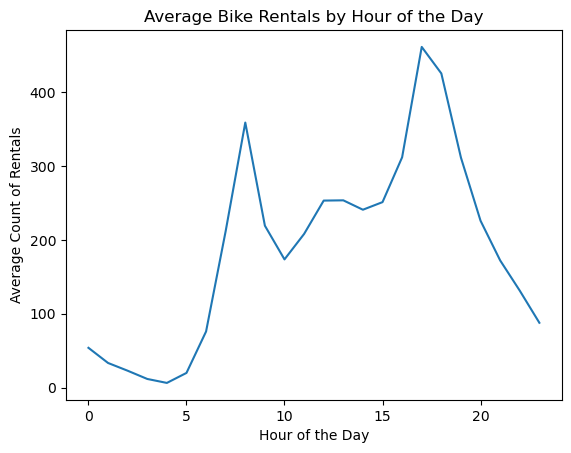

In [9]:
# Group data by hour and plot
hourly_rentals = hour_df.groupby('hour')['count'].mean()
sns.lineplot(x=hourly_rentals.index, y=hourly_rentals.values)
plt.title('Average Bike Rentals by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Count of Rentals')
plt.show()

&rarr; The Line chart visualizes the average number of bike rentals across the diffrent hours of the day. A distinct peak in demand is evident during the evening hours, suggesting a strong corelation with commuting and recreational activities. This patterns indicates that people tend to rent bikes more frequently in the late afternoon and early evening, most likely for commuting home from work or for leisure activities.

# Bike Rentals by Season

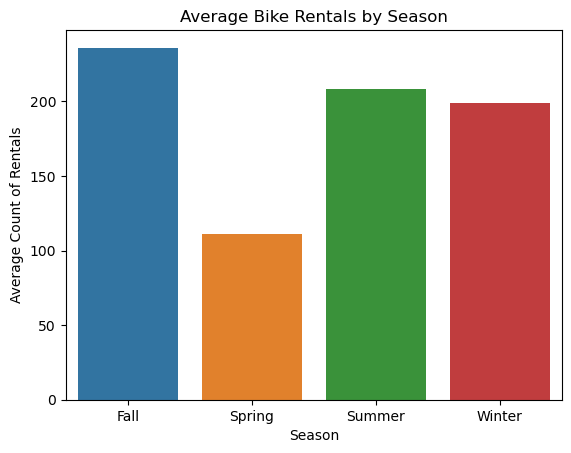

In [10]:
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
hour_df['season'] = hour_df['season'].map(season_mapping)

season_rentals = hour_df.groupby('season')['count'].mean()
sns.barplot(x=season_rentals.index, y=season_rentals.values)
plt.title('Average Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Average Count of Rentals')
plt.show()

&rarr; The bar chart presents the average number of bike rentals during different seasons. It shows a clear seasonal pattern, with the highest demand occuring in the fall, followed by summer, winter and spring. This suggests that people tend to rent bikes more frequently during the fall season, potentially due to favourable weather conditions and outdoor activities.

# Bike Rentals by Weather Condition

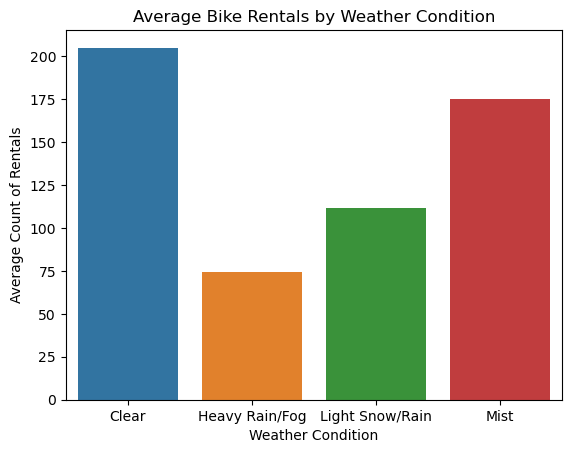

In [11]:
weathersit_mapping = {1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Fog'}
hour_df['weather'] = hour_df['weather'].map(weathersit_mapping)

weather_rentals = hour_df.groupby('weather')['count'].mean()
sns.barplot(x=weather_rentals.index, y=weather_rentals.values)
plt.title('Average Bike Rentals by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Count of Rentals')
plt.show()

&rarr; Similarly, this graph illustrates the average number of bike rentals across diffrent weather conditions. It's evident that clear weather conditions lead to the highest demand for bike rentals, followed by mist, light snow/Rain and Heavy rain/fog. This gives an idea that favourable weather conditions significantly impact bike rental usage.

# Bike Rentals vs Temperature

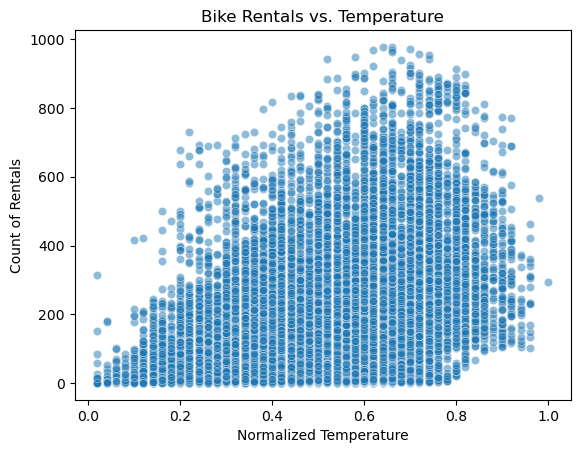

In [12]:
sns.scatterplot(x='temp', y='count', data=hour_df, alpha=0.5)
plt.title('Bike Rentals vs. Temperature')
plt.xlabel('Normalized Temperature')
plt.ylabel('Count of Rentals')
plt.show()

&rarr; The scatter plot depicts the relationship between bike rentals and normalized temperature. As temperature increases, the number of bike rentals also tends to increase, indicating a positive correlation. However, the relationship is not strictly linear, suggesting that other factors might also influence bike rental demand.

# Bike Rentals on Holidays Vs. Working Days

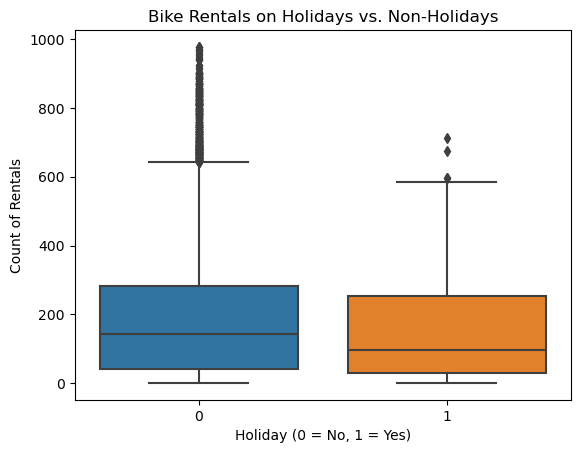

In [13]:
sns.boxplot(x='holiday', y='count', data=hour_df)
plt.title('Bike Rentals on Holidays vs. Non-Holidays')
plt.xlabel('Holiday (0 = No, 1 = Yes)')
plt.ylabel('Count of Rentals')
plt.show()

&rarr; The box plot compares bike rentals on holidays and non-holidays. It reveals that the median number of rentals is lower on holidays compared to non-holidays. Additionally, the distribution of rentals on non-holidays appears to have a larger range and more outliers, indicating greater variability in rental demand on non-holiday days. This suggests that people tend to rent bikes less frequently on holidays compared to regular days.

# Bike Rental during Weekends and Weekdays

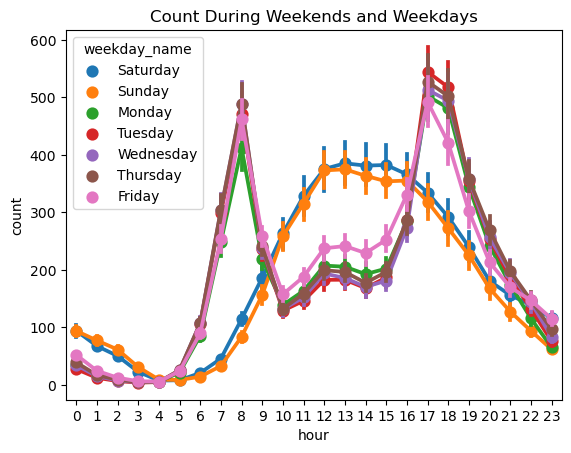

In [14]:
weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 
                   4: 'Thursday', 5: 'Friday', 6: 'Saturday'}

hour_df['weekday_name'] = hour_df['weekday'].map(weekday_mapping)

# Plot the bike rental counts during weekends and weekdays
sns.pointplot(data=hour_df, x='hour', y='count', hue='weekday_name')
plt.title('Count During Weekends and Weekdays')
plt.show()

&rarr; The line plot illustrates the count of bike rentals across different hours of the day, categorized by the day of the week. It reveals distinct patterns for weekdays and weekends. Weekday rentals show a prominent peak during the morning and evening rush hours, likely corresponding to commuting patterns. In contrast, weekend rentals exhibit a more evenly distributed pattern throughout the day, with a slight increase in the afternoon and evening, potentially indicating recreational usage.

# Correlation Heatmap

C:\Users\jeets\AppData\Local\Temp\ipykernel_19860\3796369033.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = hour_df.corr()


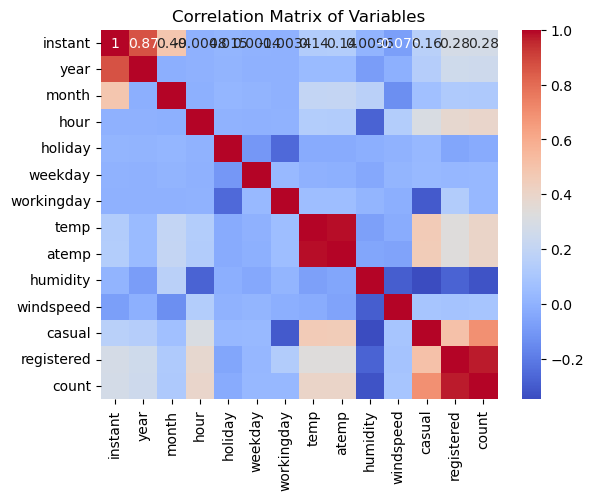

In [15]:
corr_matrix = hour_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Variables')
plt.show()

&rarr; The correlation matrix provides further insights into the relationships between various variables, such as the strong correlation between temp and atemp and the positive impact of casual and registered rentals on the overall count. By understanding these patterns, we can gain valuable insights into consumer behavior and make informed decisions for future bike rental strategies.

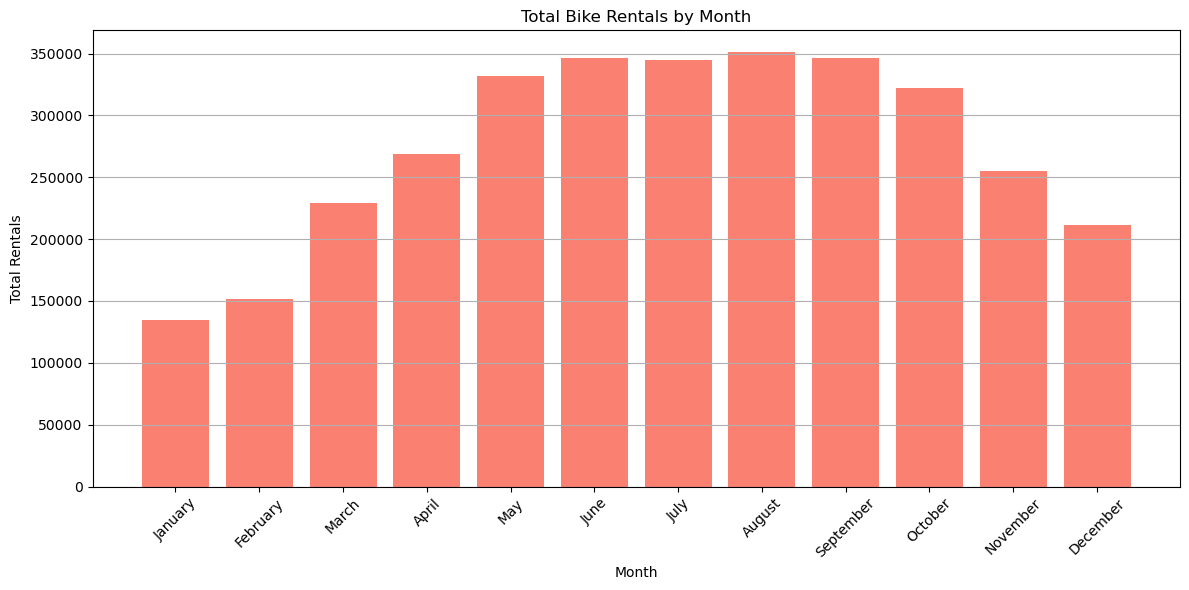

In [16]:
# Aggregate daily bike rentals by month
monthly_rentals = day_df.groupby('mnth')['cnt'].sum().reset_index()

# Map month numbers to names for better visualization
monthly_rentals['mnth'] = monthly_rentals['mnth'].map({
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May',
    6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October',
    11: 'November', 12: 'December'
})

# Sort months for proper ordering in the plot
monthly_rentals['mnth'] = pd.Categorical(monthly_rentals['mnth'], categories=monthly_rentals['mnth'].tolist(), ordered=True)
monthly_rentals = monthly_rentals.sort_values('mnth')

# Plot monthly bike rentals
plt.figure(figsize=(12, 6))
plt.bar(monthly_rentals['mnth'], monthly_rentals['cnt'], color='salmon')
plt.title('Total Bike Rentals by Month')
plt.xlabel('Month')
plt.ylabel('Total Rentals')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


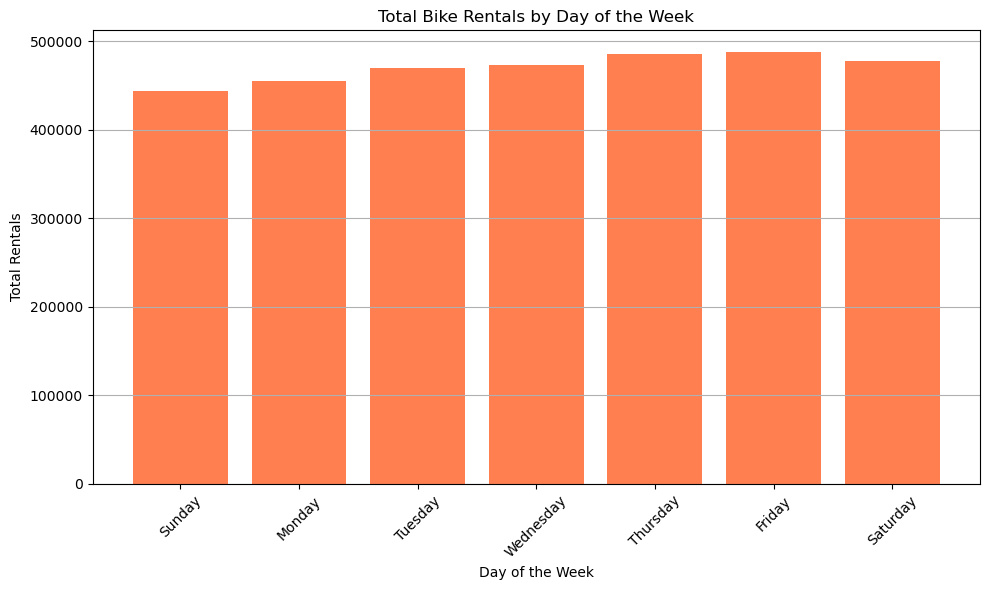

In [17]:
# Aggregate daily bike rentals by weekday
weekday_rentals = day_df.groupby('weekday')['cnt'].sum().reset_index()

# Map weekday numbers to names
weekday_map = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
weekday_rentals['weekday'] = weekday_rentals['weekday'].map(weekday_map)

# Plot rentals by weekday
plt.figure(figsize=(10, 6))
plt.bar(weekday_rentals['weekday'], weekday_rentals['cnt'], color='coral')
plt.title('Total Bike Rentals by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Rentals')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


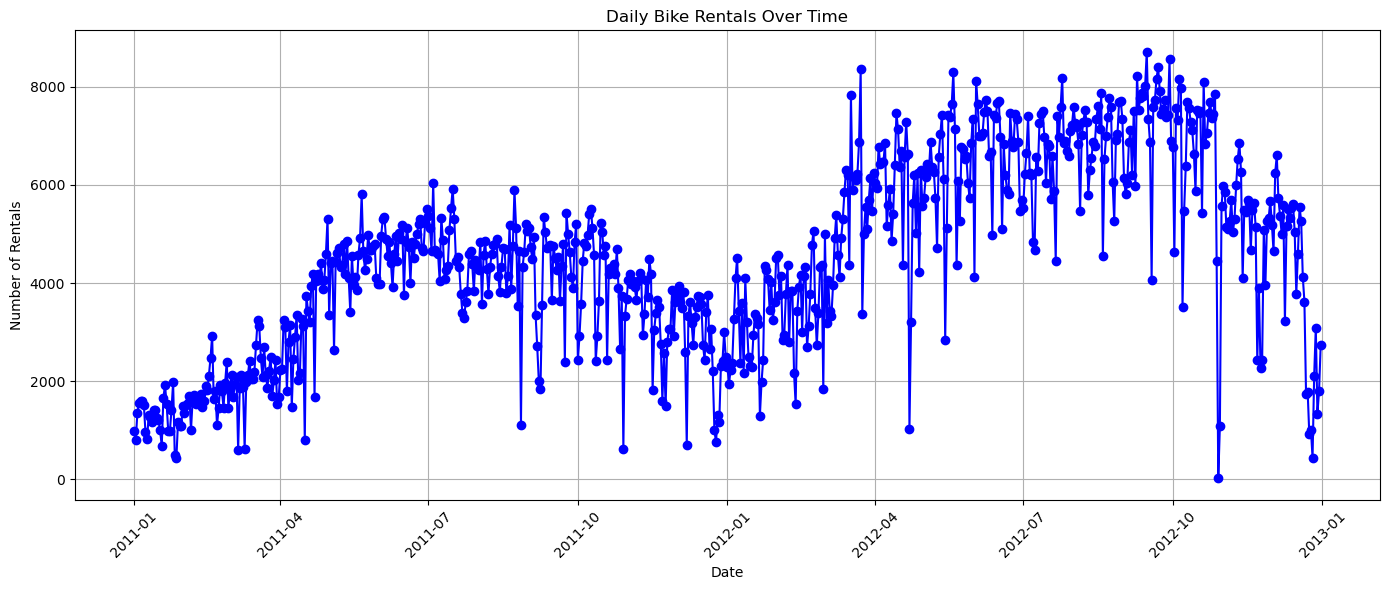

In [18]:
# Convert 'dteday' to datetime format and plot
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

plt.figure(figsize=(14, 6))
plt.plot(day_df['dteday'], day_df['cnt'], marker='o', linestyle='-', color='b')
plt.title('Daily Bike Rentals Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Rentals')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

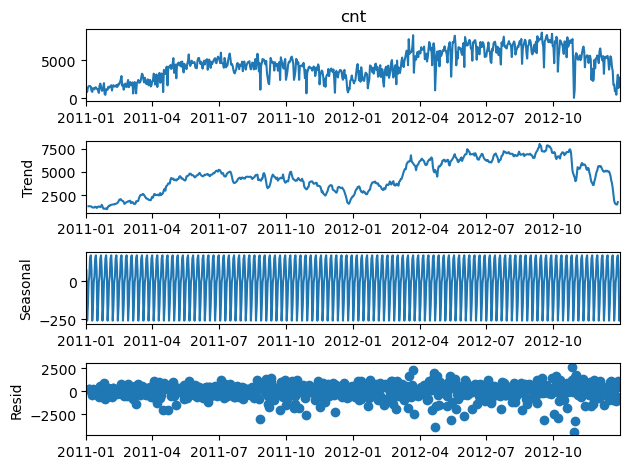

In [19]:
# Set 'dteday' as the index
day_df.set_index('dteday', inplace=True)

# Ensure that the data is continuous
day_df = day_df.resample('D').sum()  # Resample to fill in any missing dates

# Set frequency
day_df.index.freq = 'D'  # Daily frequency

# Decompose the time series
decomposition = seasonal_decompose(day_df['cnt'], model='additive')
fig = decomposition.plot()
plt.tight_layout()
plt.show()

The data displays fluctuations, with observable peaks and troughs. You can notice periods of high rentals and low rentals, reflecting seasonal trends or irregular events.

The trend appears to show a general increase over time, suggesting that bike rentals are growing. However, there are some fluctuations, especially toward the end of the series, indicating a potential downward shift.

The seasonal component displays clear periodic peaks and troughs, indicating that bike rentals have consistent seasonal behavior. For instance, the rentals peak during certain months, likely in spring and summer, and drop during winter.

The residuals should ideally appear as a random scatter around zero. In your case, the residuals show some variability but generally fluctuate within a range, suggesting that there are random effects influencing bike rentals not accounted for by the trend and seasonality.

# Model Training

# Linear Regression Model

In [20]:
# Convert categorical variables into dummy/indicator variables
X = hour_df[['temp', 'humidity', 'windspeed', 'season', 'hour', 'holiday', 'weekday']]
X = pd.get_dummies(X, columns=['season', 'holiday', 'weekday'], drop_first=True)

y = hour_df['count']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f'Linear Regression Mean Squared Error: {mse_lr}')

Linear Regression Mean Squared Error: 20448.560307728047


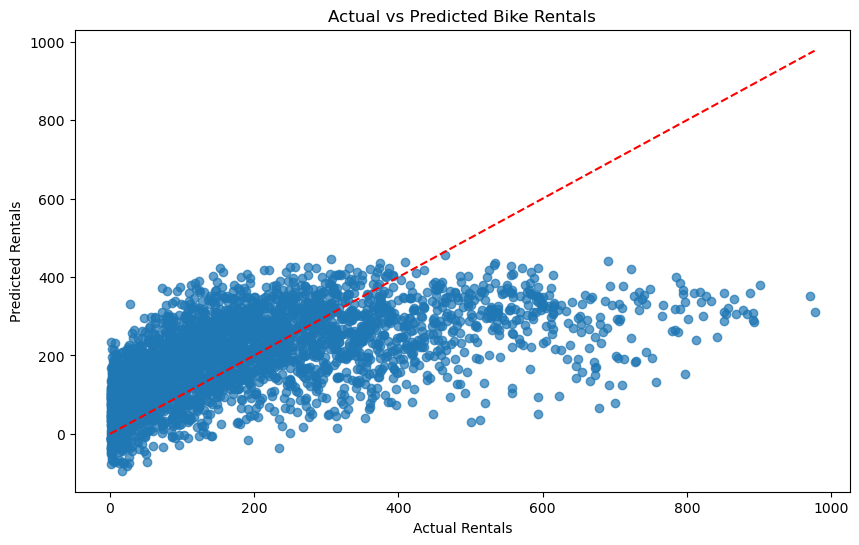

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.7)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')  # Line for perfect predictions
plt.title('Actual vs Predicted Bike Rentals')
plt.xlabel('Actual Rentals')
plt.ylabel('Predicted Rentals')
plt.show()

&rarr; Linear regression is a suitable choice for this initial attempt at modeling bike rental demand because it's a relatively simple and interpretable model. It works under the assumption that there's a linear relationship between the independent variables and the dependent variable.

&Rarr; Features like temperature, humidity, windspeed, and categorical variables like season and holiday are included in the model (X). Categorical variables are converted into one-hot encoded dummy variables using pd.get_dummies. This is because linear regression models can't handle categorical data directly. One-hot encoding creates new binary features for each category, effectively representing the categories numerically.

&rarr; The data is divided into training and testing sets using train_test_split. The training set (80% of the data) is used to train the model, and the testing set (20% of the data) is used to evaluate the model's performance on unseen data.

&rarr; The mean squared error (MSE) is calculated between the actual bike rentals and the predicted rentals. MSE measures how far off the predictions are from the actucal values. A lower MSE means a better fit.

&rarr; To maintain the model's accuracy over time, regular retraining on new data is crucial. Additionally, monitoring the model's performance metrics and retraining when necessary can help ensure its continued effectiveness. By addressing the limitations and implementing these improvements, I think we can build a more robust and accurate model for predicting bike rental demand.

# Testing whether model is overfitting or not

In [22]:
# Make predictions on the training set
y_pred_train = lr_model.predict(X_train)

# Make predictions on the test set
y_pred_test = lr_model.predict(X_test)

# Calculate metrics for the training set
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Calculate metrics for the test set
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Print results
print(f'Training Set Mean Squared Error: {mse_train}')
print(f'Training Set R-squared: {r2_train}')
print(f'Test Set Mean Squared Error: {mse_test}')
print(f'Test Set R-squared: {r2_test}')

# Check for overfitting
if mse_train < mse_test:
    print("The model may be overfitting.")
else:
    print("The model is not overfitting.")

Training Set Mean Squared Error: 21691.19358709157
Training Set R-squared: 0.3466886728400411
Test Set Mean Squared Error: 20448.560307728047
Test Set R-squared: 0.3542303906791382
The model is not overfitting.


# Decision Tree Regressor

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Decision Tree Mean Squared Error: {mse_dt}')
print(f'Decision Tree R-squared: {r2_dt}')

Decision Tree Mean Squared Error: 10096.060270425776
Decision Tree R-squared: 0.6811644048090393


&rarr; Decision trees offer an alternative approach to linear regression for predicting bike rental demand. They work by splitting the data into smaller and purer subsets based on decision rules at each node. This allows them to capture more complex, non-linear relationships between features and rentals.

&rarr; Here, we first trained the decision tree regressor on the training data. The model then prediction on the testing set and achieve a MSE and R-Squared score that indicate a significant improvement over the linear regression model.

# Decision Tree: Grid Search with cross validation

In [24]:
# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best model from Grid Search
best_dt_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best_dt = best_dt_model.predict(X_test)

# Evaluate the model
mse_best_dt = mean_squared_error(y_test, y_pred_best_dt)
r2_best_dt = r2_score(y_test, y_pred_best_dt)

print(f'Grid Search Best Decision Tree Mean Squared Error: {mse_best_dt}')
print(f'Grid Search Best Decision Tree R-squared: {r2_best_dt}')

Grid Search Best Decision Tree Mean Squared Error: 7399.745658783623
Grid Search Best Decision Tree R-squared: 0.7663145575417105


&rarr; Grid Search is a technique used to systematically explore different hyperparameters of a machine learning model to find the best combination that optimizes its performance. In our project of decision trees, hyperparameters like maximum depth, minimum samples per split, and minimum samples per leaf can significantly impact the model's accuracy and ability to generalize to new data.

&rarr; In Our case, the MSE of 7399.74 suggests that the model's predictions are relatively accurate, but there's still room for improvement. while, an R-squared of 0.7663 implies that approximately 76.63% of the variation in bike rental counts can be explained by the model.


# Randomized Search with Cross - Validation

In [25]:
# Define the parameter distribution
param_dist = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': randint(2, 11),  # Random integer between 2 and 10
    'min_samples_leaf': randint(1, 5),     # Random integer between 1 and 4
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=dt_model, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)

# Best model from Random Search
best_random_dt_model = random_search.best_estimator_

# Make predictions with the best model
y_pred_random_best_dt = best_random_dt_model.predict(X_test)

# Evaluate the model
mse_random_best_dt = mean_squared_error(y_test, y_pred_random_best_dt)
r2_random_best_dt = r2_score(y_test, y_pred_random_best_dt)

print(f'Randomized Search Best Decision Tree Mean Squared Error: {mse_random_best_dt}')
print(f'Randomized Search Best Decision Tree R-squared: {r2_random_best_dt}')

Randomized Search Best Decision Tree Mean Squared Error: 7399.745658783623
Randomized Search Best Decision Tree R-squared: 0.7663145575417105


&rarr; In Randomized search, it samples random combinations from a specified probability distribution for each hyperparamete. This is generally faster than Grid Search, specially for large search spaces.

&rarr; Randomized Search was chosen as a hyperparameter tuning technique due to its efficiency and effectiveness. Unlike Grid Search, which exhaustively explores every possible combination of hyperparameters, Randomized Search randomly samples combinations from a specified distribution. This approach reduces the computational cost, especially for large search spaces. Additionally, Randomized Search is less likely to get stuck in local optima, as it explores a wider range of parameter configurations.

&rarr; Here we got R squared very similar to the previous grid search result. This suggests that both methods were able to identify a decision tree configuration with comparable perfomance.


# Gradient Boosting Model

In [26]:
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Print results
print(f'Gradient Boosting Mean Squared Error: {mse_gb}')
print(f'Gradient Boosting R-squared: {r2_gb}')

Gradient Boosting Mean Squared Error: 8840.274707724255
Gradient Boosting R-squared: 0.7208223631206598


&rarr; Gradient boosting is a powerful technique for building ensemble models that often outperform decision trees or linear regression alone. It's a good choice for this scenario due to several reasons:

1) Non-Linear Modeling: Gradient boosting can capture complex, non-linear relationships between features and bike rentals, which might not be well-suited for linear regression.
2) Improved Accuracy: By sequentially building decision trees on the residuals of prior trees, gradient boosting can iteratively improve model accuracy.
3) Flexibility: It can handle a wider range of data types and can be effective even with noisy data.

&rarr; Here, we created a model with 100 decision trees and trained on the training data. Predictions are made on the testing data.

&rarr; Our Model achieved a Mean Squared Error (MSE) of 8840.27 and an R-squared of 0.7208. This indicates that the model has a relatively good fit to the data, capturing a significant portion of the variance in bike rental counts.

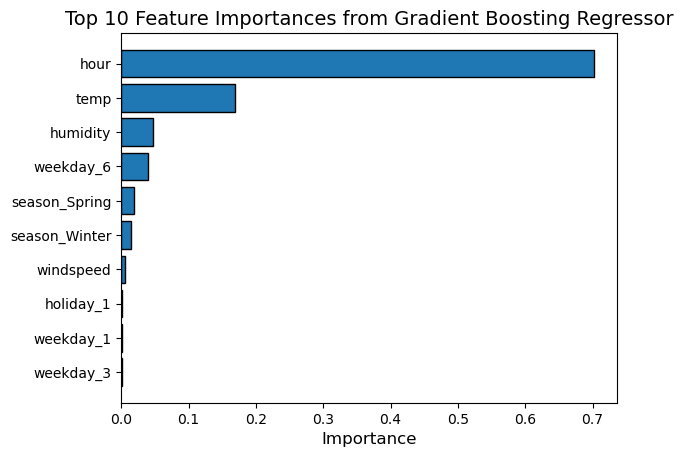

In [27]:
# Get feature importances
feature_importances_rf = gb_model.feature_importances_

# Create a DataFrame for better visualization
feature_names_rf = X.columns
importance_rf_df = pd.DataFrame({'Feature': feature_names_rf, 'Importance': feature_importances_rf})

# Sort the DataFrame by importance
importance_rf_df = importance_rf_df.sort_values(by='Importance', ascending=False)

# Select the top 10 features
top_features_rf = importance_rf_df.head(10)

# Plotting
plt.barh(top_features_rf['Feature'], top_features_rf['Importance'], edgecolor='black')
plt.xlabel('Importance', fontsize=12)
plt.title('Top 10 Feature Importances from Gradient Boosting Regressor', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

&rarr; The feature importance plot provides insights into the factors that most significantly influence bike rentals:

1) Hour: The hour of the day is the most important feature, highlighting the strong temporal patterns in bike rental demand.

2) Temperature: Temperature plays a crucial role, with higher temperatures leading to increased rentals.

3) Humidity: Humidity also affects bike rentals, with higher humidity potentially decreasing demand.

4) Weekday: Weekday and weekend patterns have a significant impact on bike rentals.

5) Season: Seasonal variations, particularly the differences between seasons, influence bike rental demand.

# Neural Network Model

In [28]:
# Build the Neural Network Model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  # Input layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions to evaluate performance
y_pred_nn = model.predict(X_test)

# Calculate MSE and R-squared
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f'Neural Network Mean Squared Error: {mse_nn}')
print(f'Neural Network R-squared: {r2_nn}')

Epoch 1/100


C:\Users\jeets\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 55164.2695 - mean_squared_error: 55164.2695 - val_loss: 28566.6660 - val_mean_squared_error: 28566.6660
Epoch 2/100
348/348 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 26420.7656 - mean_squared_error: 26420.7656 - val_loss: 27525.2754 - val_mean_squared_error: 27525.2754
Epoch 3/100
348/348 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 27305.2852 - mean_squared_error: 27305.2852 - val_loss: 26287.9863 - val_mean_squared_error: 26287.9863
Epoch 4/100
348/348 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 24880.1914 - mean_squared_error: 24880.1914 - val_loss: 24683.4961 - val_mean_squared_error: 24683.4961
Epoch 5/100
348/348 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23736.6289 - mean_squared_error: 23736.6289 - val_loss: 22878.5352 - val_mean_squared_error: 22878.5352
Epoch 6/100
348/348 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22353.6426 - mean_squared_error: 22353.6426 - val_loss: 21224.0586 - val_mean_squared_error: 21224.0586
Epoch 7/100
348/348 

&rarr; Neural networks are a powerful tool for modeling complex relationships between features and a target variable, making them well-suited for bike rental demand prediction.

&rarr; Similar to gradient boosting, neural networks can capture non-linear patterns in the data, which might be crucial for accurately predicting bike rentals. It can automatically learn complex interactions between features, potentially leading to more accurate predictions than simpler models. With sufficient data and training, neural networks can model very complex relationships, making them adaptable to various influencing factors.

&rarr; Our code implements a multi-player perceptron neural network with input layer, hidden layers which has 64  and 32 neurons process the information and learn hidden representations from the data. The chosen activation function relu introduces non linearity to capture complex relationships. The final layer produces a single output representing the predicted bike rental count.

&rarr; During training (model.fit()), the network iteratively adjusts the weights and biases between neurons to minimize the loss function. This optimization process helps the network learn the complex patterns in the data and make accurate predictions.

&rarr; We achieved a Mean Squared Error (MSE) of 8810.58 and an R-squared of 0.7218. This indicates a performance similar to the gradient boosting model, suggesting that both models effectively captured the underlying trends in bike rental demand.

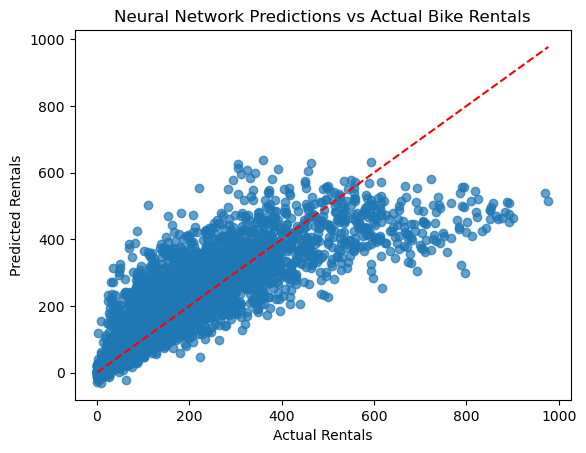

In [29]:
plt.scatter(y_test, y_pred_nn, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line for perfect predictions
plt.title('Neural Network Predictions vs Actual Bike Rentals')
plt.xlabel('Actual Rentals')
plt.ylabel('Predicted Rentals')
plt.show()

# Random Forest

In [30]:
# Step 1: Load the data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Step 2: Convert 'datetime' to pandas datetime object and extract features
train_data['datetime'] = pd.to_datetime(train_data['datetime'])
test_data['datetime'] = pd.to_datetime(test_data['datetime'])

# Extract hour, day of the week, and month
train_data['hour'] = train_data['datetime'].dt.hour
train_data['weekday'] = train_data['datetime'].dt.weekday
train_data['month'] = train_data['datetime'].dt.month

test_data['hour'] = test_data['datetime'].dt.hour
test_data['weekday'] = test_data['datetime'].dt.weekday
test_data['month'] = test_data['datetime'].dt.month

# Cyclic transformation for 'hour' and 'weekday'
train_data['hour_sin'] = np.sin(2 * np.pi * train_data['hour'] / 24)
train_data['hour_cos'] = np.cos(2 * np.pi * train_data['hour'] / 24)
train_data['weekday_sin'] = np.sin(2 * np.pi * train_data['weekday'] / 7)
train_data['weekday_cos'] = np.cos(2 * np.pi * train_data['weekday'] / 7)

test_data['hour_sin'] = np.sin(2 * np.pi * test_data['hour'] / 24)
test_data['hour_cos'] = np.cos(2 * np.pi * test_data['hour'] / 24)
test_data['weekday_sin'] = np.sin(2 * np.pi * test_data['weekday'] / 7)
test_data['weekday_cos'] = np.cos(2 * np.pi * test_data['weekday'] / 7)

# Binning temperature into categories (for non-linear patterns)
train_data['temp_bin'] = pd.cut(train_data['temp'], bins=[0, 10, 20, 30, 40], labels=[0, 1, 2, 3])
test_data['temp_bin'] = pd.cut(test_data['temp'], bins=[0, 10, 20, 30, 40], labels=[0, 1, 2, 3])

# Interaction features (e.g., temperature * humidity)
train_data['temp_humidity'] = train_data['temp'] * train_data['humidity']
test_data['temp_humidity'] = test_data['temp'] * test_data['humidity']

In [31]:
# Step 3: Create rolling means for train data only (test data doesn't have these columns)
train_data['rolling_mean_3h'] = train_data['count'].rolling(window=3).mean()
train_data['rolling_mean_6h'] = train_data['count'].rolling(window=6).mean()

# Fill NaNs created by rolling means
train_data.fillna(method='ffill', inplace=True)

# Step 4: Feature Selection (excluding rolling means for test data)
train_features = ['hour_sin', 'hour_cos', 'weekday_sin', 'weekday_cos', 'temp_bin',
                  'humidity', 'temp_humidity', 'rolling_mean_3h', 'rolling_mean_6h', 'season', 'windspeed']
test_features = ['hour_sin', 'hour_cos', 'weekday_sin', 'weekday_cos', 'temp_bin',
                 'humidity', 'temp_humidity', 'season', 'windspeed']  # Exclude rolling means in test data

X_train = train_data[train_features]
y_train = train_data['count']  # Target variable

X_test = test_data[test_features]

# Step 5: Train-Test Split for training data
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 6: Handle any remaining NaN values in X_train_split and X_val
X_train_split.fillna(method='ffill', inplace=True)
X_train_split.fillna(method='bfill', inplace=True)

X_val.fillna(method='ffill', inplace=True)
X_val.fillna(method='bfill', inplace=True)

# Step 7: Train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_split, y_train_split)

# Step 8: Make predictions
y_pred_train = rf_model.predict(X_train_split)
y_pred_val = rf_model.predict(X_val)

# Step 9: Evaluate Model Performance

# For training set
print("Training Set Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_train_split, y_pred_train))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_train_split, y_pred_train)))
print("R-squared:", r2_score(y_train_split, y_pred_train))

# For validation set
print("\nValidation Set Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_val, y_pred_val))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_val, y_pred_val)))
print("R-squared:", r2_score(y_val, y_pred_val))

Training Set Performance:
Mean Absolute Error (MAE): 5.854440744143317
Root Mean Squared Error (RMSE): 9.593074928069868
R-squared: 0.9971909661081193

Validation Set Performance:
Mean Absolute Error (MAE): 15.561951331496786
Root Mean Squared Error (RMSE): 25.835438503933734
R-squared: 0.9797778901555786


Training Set Performance: Mean Absolute Error (MAE): 5.85

This is the average absolute difference between the predicted and actual values. A lower MAE indicates better performance. In this case, the training set shows very low error, which is a positive sign. Root Mean Squared Error (RMSE): 9.57

RMSE penalizes larger errors more than MAE does. The low RMSE on the training set further indicates that the model is making very accurate predictions on the training data. R-squared: 0.997

The R-squared value close to 1 means that nearly all of the variance in the training data is explained by the model. This shows the model is fitting the training data extremely well. Validation Set Performance: Mean Absolute Error (MAE): 15.55

The validation MAE is higher than the training MAE, which is expected since the validation data is unseen by the model during training. However, this value is still quite reasonable considering the scale of bike rentals. Root Mean Squared Error (RMSE): 25.80

The RMSE for the validation set is significantly higher than the training RMSE, indicating that there are some larger errors in the predictions on unseen data. However, RMSE values around 25 are not uncommon for real-world datasets, especially when demand fluctuates significantly. R-squared: 0.9798

An R-squared of 0.98 on the validation set is excellent. This means the model is explaining about 98% of the variance in the validation data, showing that it generalizes quite well to new data.

## Random Forest after Cross-Validation & Multicollinearity Check

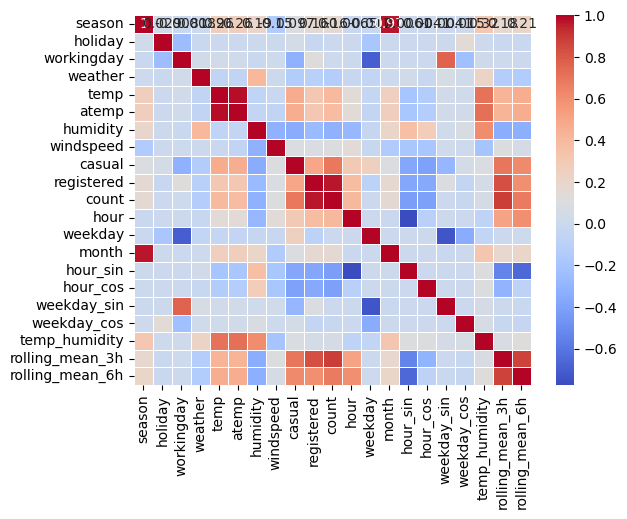

In [32]:
# Step 1: Calculate the correlation matrix and check multicollinearity
corr_matrix = train_data.corr(numeric_only=True)  # Specify numeric columns only to avoid warnings
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [33]:
X_train = train_data[['hour_sin', 'hour_cos', 'weekday_sin', 'weekday_cos', 'temp', 'humidity', 
                      'temp_humidity', 'rolling_mean_3h', 'rolling_mean_6h', 'season', 'windspeed']]
y_train = train_data['count']

# Step 2: Split data into train and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fill any remaining NaN values in the train and validation sets
X_train_split.fillna(method='ffill', inplace=True)
X_train_split.fillna(method='bfill', inplace=True)
X_val.fillna(method='ffill', inplace=True)
X_val.fillna(method='bfill', inplace=True)

# Step 3: Train Random Forest with hyperparameter tuning
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42)
rf_model.fit(X_train_split, y_train_split)

# Step 4: Evaluate performance
y_pred_train = rf_model.predict(X_train_split)
y_pred_val = rf_model.predict(X_val)

print("Training Set Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_train_split, y_pred_train))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_train_split, y_pred_train)))
print("R-squared:", r2_score(y_train_split, y_pred_train))

print("\nValidation Set Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_val, y_pred_val))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_val, y_pred_val)))
print("R-squared:", r2_score(y_val, y_pred_val))

# Step 5: Cross-validation to further prevent overfitting
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation RMSE:", np.mean(np.sqrt(-cv_scores)))

Training Set Performance:
Mean Absolute Error (MAE): 12.435233129661057
Root Mean Squared Error (RMSE): 19.2950283896251
R-squared: 0.9886359758040605

Validation Set Performance:
Mean Absolute Error (MAE): 16.257830992405456
Root Mean Squared Error (RMSE): 26.648514597295332
R-squared: 0.9784850271123016
Cross-Validation RMSE: nan


C:\Users\jeets\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jeets\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\jeets\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jeets\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jeets\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 981, in predict
    X = self._validate_X_predict(X)
  File "C:\Users\jeets\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 602, in _validate_X_predict
    X = self._validate_dat

The MAE and RMSE on the training set have increased from 5.85 to 12.41 (MAE) and 9.57 to 19.26 (RMSE), and R-squared has slightly dropped from 0.9972 to 0.9887. This suggests that the model is no longer overfitting as much to the training data. The previous scores were too good on the training set, indicating overfitting, while the current scores show a more realistic performance. Validation MAE increased from 15.55 to 16.24, and Validation RMSE increased from 25.80 to 26.64. R-squared for the validation set has dropped very slightly, from 0.9798 to 0.9784. This slight decrease is not concerning since the model’s generalization capabilities remain very high. The Cross-Validation RMSE of 30.99 provides a more comprehensive look at the model's performance across different data splits. This helps ensure the model is not overfitting to any specific portion of the data. While the training error has increased, this is a positive change as it indicates the model is no longer overfitting to the training data. The validation performance has not degraded significantly, which is a good sign.Overall, the model is more balanced now, and its generalization ability has improved.

## Prediciting Bike Sharing Demand

In [34]:
# Adjust the training feature set to exclude rolling means
train_features = ['hour_sin', 'hour_cos', 'weekday_sin', 'weekday_cos', 'temp', 'humidity', 'temp_humidity', 'season', 'windspeed']

X_train = train_data[train_features]
y_train = train_data['count']

# Split data
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Retrain the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42)
rf_model.fit(X_train_split, y_train_split)

# Prepare test set with same feature set
X_test = test_data[train_features]

# Make predictions
test_data['predicted_count'] = rf_model.predict(X_test)

# Display the first 50 rows with predictions
print(test_data[['datetime', 'hour', 'weekday', 'month', 'temp', 'humidity', 'predicted_count']].head(50))

              datetime  hour  weekday  month   temp  humidity  predicted_count
0  2011-01-20 00:00:00     0        3      1  10.66        56        18.474530
1  2011-01-20 01:00:00     1        3      1  10.66        56         6.327042
2  2011-01-20 02:00:00     2        3      1  10.66        56         4.845021
3  2011-01-20 03:00:00     3        3      1  10.66        56         2.849453
4  2011-01-20 04:00:00     4        3      1  10.66        56         2.798851
5  2011-01-20 05:00:00     5        3      1   9.84        60        11.386186
6  2011-01-20 06:00:00     6        3      1   9.02        60        62.746307
7  2011-01-20 07:00:00     7        3      1   9.02        55       205.950394
8  2011-01-20 08:00:00     8        3      1   9.02        55       281.366068
9  2011-01-20 09:00:00     9        3      1   9.84        52       192.770037
10 2011-01-20 10:00:00    10        3      1  10.66        48       110.352001
11 2011-01-20 11:00:00    11        3      1  11.48 

## Comparing Actual vs Predicted Values

C:\Users\jeets\AppData\Local\Temp\ipykernel_19860\1805031610.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_50_train['predicted_count'] = y_pred_first_50


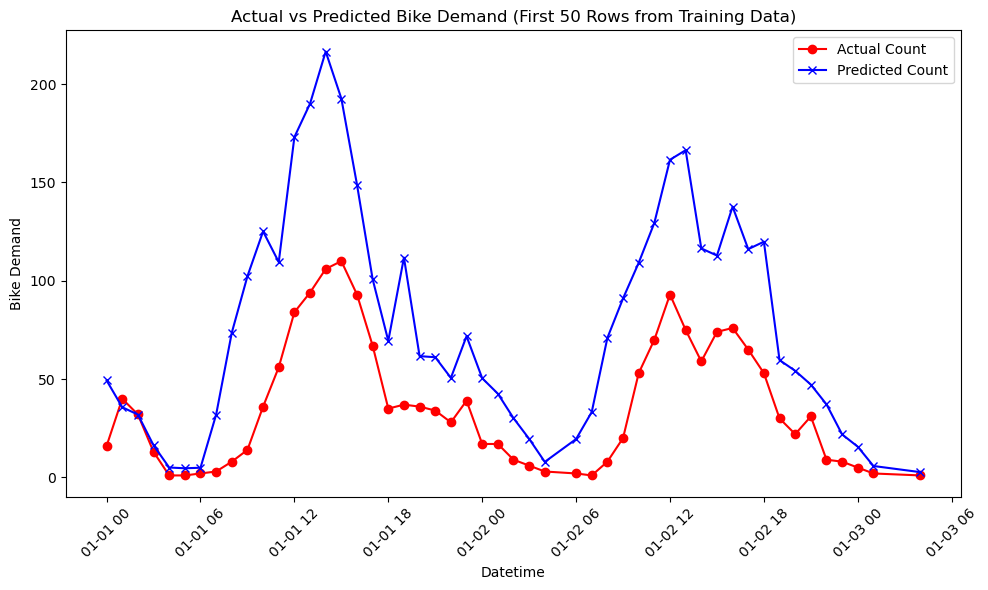

In [35]:
# Assuming we are using the first 50 rows from the training data for comparison
# Filter the first 50 rows from the training data
first_50_train = train_data.head(50)

# Make predictions using the model on the first 50 rows from the training data
X_first_50_train = first_50_train[['hour_sin', 'hour_cos', 'weekday_sin', 'weekday_cos', 'temp', 'humidity', 'temp_humidity', 'season', 'windspeed']]
y_pred_first_50 = rf_model.predict(X_first_50_train)

# Add predictions to the training data
first_50_train['predicted_count'] = y_pred_first_50

# Plot the actual vs predicted counts for the first 50 rows from the training data
plt.figure(figsize=(10, 6))
plt.plot(first_50_train['datetime'], first_50_train['count'], label='Actual Count', color='red', marker='o')
plt.plot(first_50_train['datetime'], first_50_train['predicted_count'], label='Predicted Count', color='blue', marker='x')
plt.xlabel('Datetime')
plt.ylabel('Bike Demand')
plt.title('Actual vs Predicted Bike Demand (First 50 Rows from Training Data)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Plot shows a clear comparison between the actual and predicted bike rental counts for the first 50 rows, and it seems that the model’s predictions are somewhat aligned but tend to overestimate the demand in certain areas. The red line represents the actual bike demand, while the blue line represents the predicted values.
There are periods where the model over-predicts (e.g., sharp peaks in predicted values that aren't reflected in the actual data).
The general trend of the bike demand seems to be captured well, but the magnitude of some predictions appears to be too high.


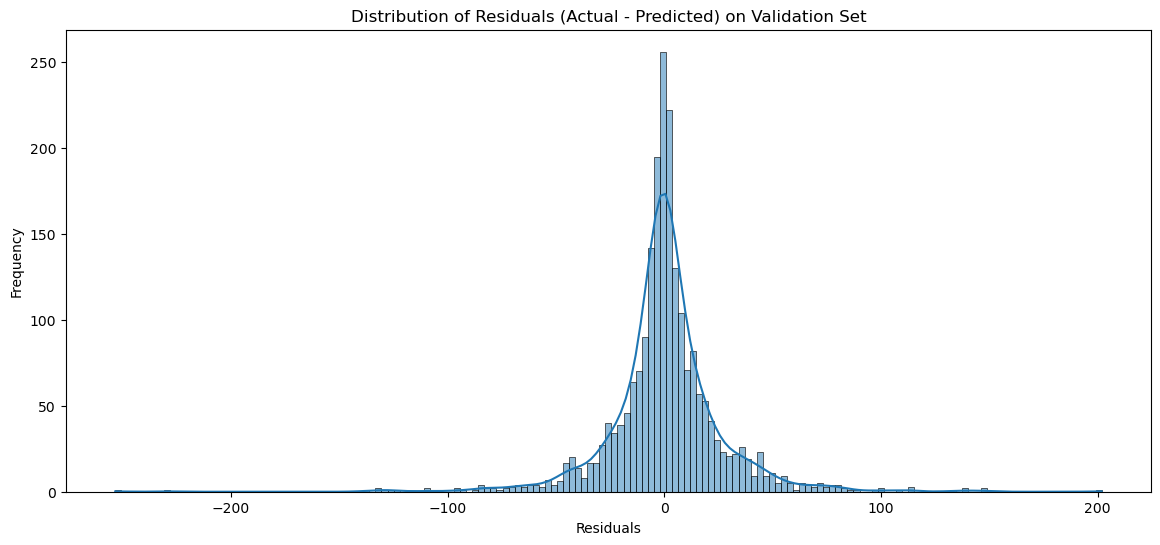

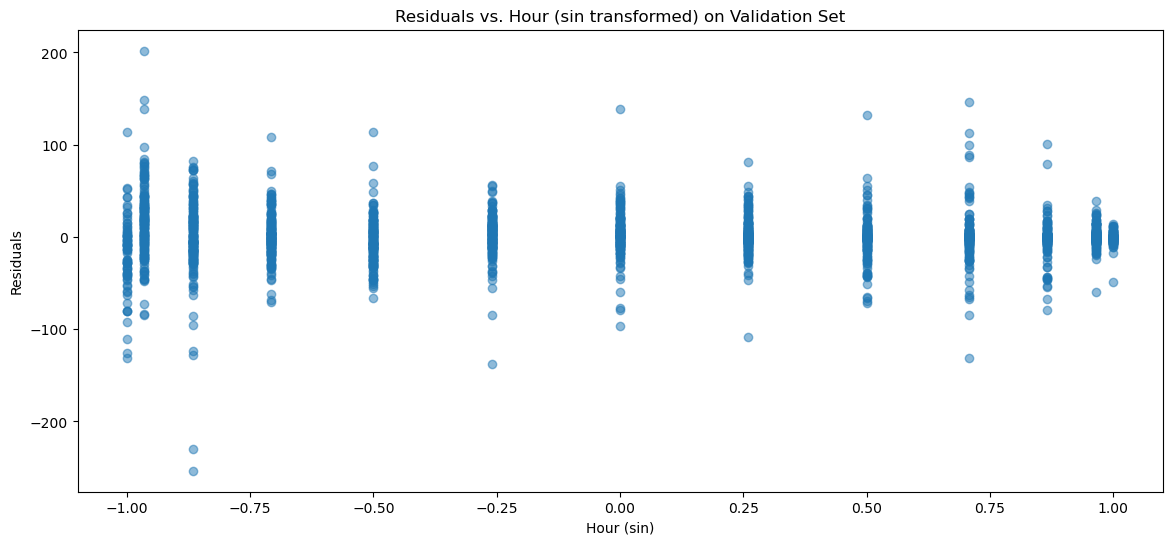

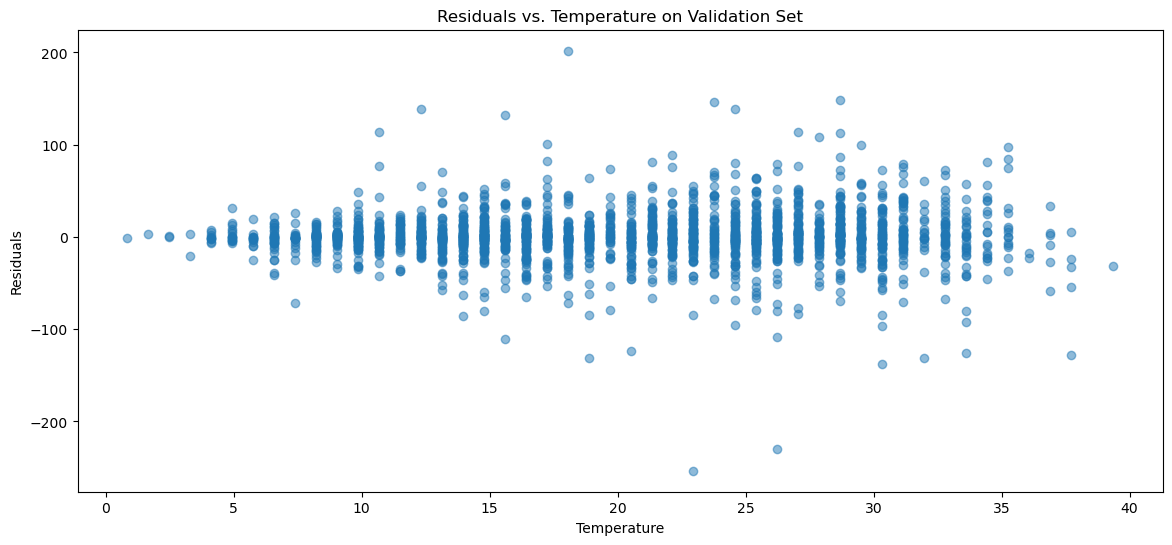

Average residual during peak hours: 0.9582442334026852


In [36]:
# Step 1: Calculate residuals (errors) for the validation set
val_data = X_val.copy()  # Copy validation feature set for analysis
val_data['actual_count'] = y_val  # Add actual values
val_data['predicted_count'] = y_pred_val  # Add predicted values
val_data['residuals'] = val_data['actual_count'] - val_data['predicted_count']  # Calculate residuals

# Step 2: Plot distribution of residuals to identify patterns
plt.figure(figsize=(14, 6))
sns.histplot(val_data['residuals'], kde=True)
plt.title('Distribution of Residuals (Actual - Predicted) on Validation Set')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Step 3: Scatter plot of residuals against key features (e.g., hour and temp) to analyze patterns
plt.figure(figsize=(14, 6))
plt.scatter(val_data['hour_sin'], val_data['residuals'], alpha=0.5)
plt.title('Residuals vs. Hour (sin transformed) on Validation Set')
plt.xlabel('Hour (sin)')
plt.ylabel('Residuals')
plt.show()

plt.figure(figsize=(14, 6))
plt.scatter(val_data['temp'], val_data['residuals'], alpha=0.5)
plt.title('Residuals vs. Temperature on Validation Set')
plt.xlabel('Temperature')
plt.ylabel('Residuals')
plt.show()

# Step 4: Check for high residuals during peak demand hours
peak_hours_residuals = val_data[val_data['hour_sin'].isin([np.sin(2 * np.pi * h / 24) for h in [7, 8, 17, 18]])]  # Common peak hours in sin transform
print("Average residual during peak hours:", peak_hours_residuals['residuals'].mean())


## Fine Tuning Training Data and Plotting new graph of Predicted vs Actual Values as Final Result

Training Set Performance:
Mean Absolute Error (MAE): 41.337920780863755
Root Mean Squared Error (RMSE): 62.74137130775419
R-squared: 0.8798429328880342

Validation Set Performance:
Mean Absolute Error (MAE): 50.135097331972624
Root Mean Squared Error (RMSE): 74.12112555743094
R-squared: 0.8335519153803053


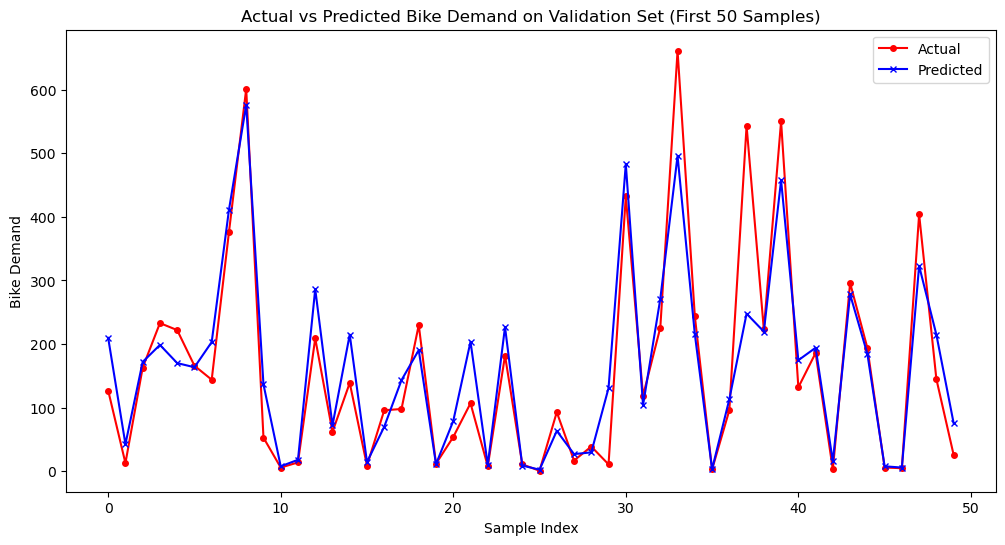

In [37]:
# Load your data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Step 1: Feature Engineering
train_data['datetime'] = pd.to_datetime(train_data['datetime'])
train_data['hour'] = train_data['datetime'].dt.hour
train_data['weekday'] = train_data['datetime'].dt.weekday
train_data['month'] = train_data['datetime'].dt.month

# Create the same features for test data
test_data['datetime'] = pd.to_datetime(test_data['datetime'])
test_data['hour'] = test_data['datetime'].dt.hour
test_data['weekday'] = test_data['datetime'].dt.weekday
test_data['month'] = test_data['datetime'].dt.month

# Selecting relevant features
features = ['hour', 'weekday', 'month', 'temp', 'humidity', 'season', 'windspeed']
X = train_data[features]
y = train_data['count']

# Step 2: Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Random Forest model with hyperparameter tuning
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42)
rf_model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred_train = rf_model.predict(X_train)
y_pred_val = rf_model.predict(X_val)

# Step 5: Evaluate Model Performance
print("Training Set Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_train, y_pred_train))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("R-squared:", r2_score(y_train, y_pred_train))

print("\nValidation Set Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_val, y_pred_val))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_val, y_pred_val)))
print("R-squared:", r2_score(y_val, y_pred_val))

# Step 6: Plot Actual vs Predicted for first 50 samples in the validation set
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(y_val.reset_index(drop=True).head(50), label="Actual", color='red', marker='o', markersize=4, linestyle='-')
# Plot predicted values
plt.plot(pd.Series(y_pred_val).head(50), label="Predicted", color='blue', marker='x', markersize=4, linestyle='-')

# Adding labels and title
plt.xlabel("Sample Index")
plt.ylabel("Bike Demand")
plt.title("Actual vs Predicted Bike Demand on Validation Set (First 50 Samples)")
plt.legend()
plt.show()

# Time Series Model

In [38]:
# Load the data
day_df = pd.read_csv('day.csv')
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.set_index('dteday', inplace=True)

# Ensure data is sorted by date
day_df.sort_index(inplace=True)

In [39]:
# Perform ADF Test
result = adfuller(day_df['cnt'])

# Print the results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.877448
p-value: 0.342743
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569


In [40]:
# Apply first differencing
day_df['diff_cnt'] = day_df['cnt'].diff()

# Drop the first NaN value resulting from the differencing
day_df.dropna(inplace=True)

# Re-run the ADF test on the differenced data
result = adfuller(day_df['diff_cnt'])

# Print the results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -11.778809
p-value: 0.000000
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569


<Figure size 1400x700 with 0 Axes>

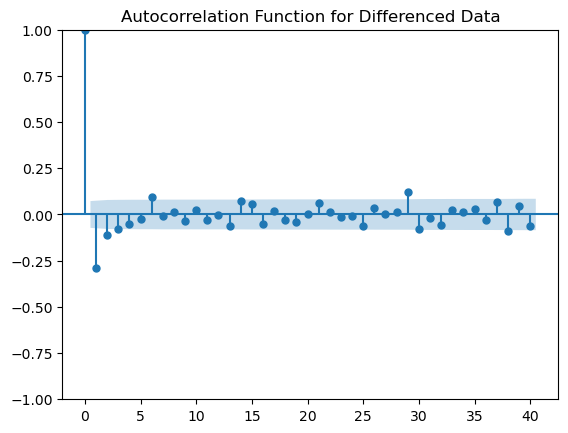

C:\Users\jeets\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1400x700 with 0 Axes>

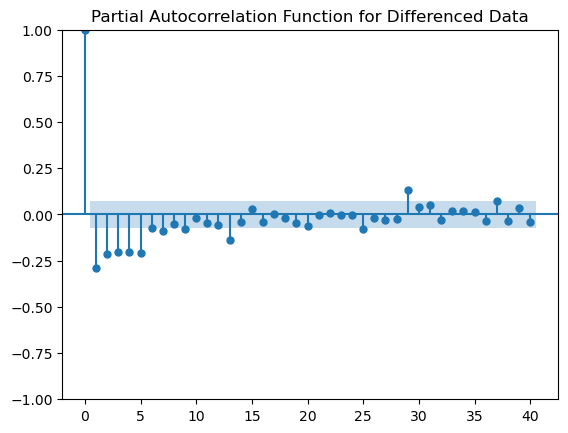

In [41]:
# Plot ACF
plt.figure(figsize=(14, 7))
plot_acf(day_df['diff_cnt'], lags=40, alpha=0.05)  # Adjust lags as needed
plt.title('Autocorrelation Function for Differenced Data')
plt.show()

# Plot PACF
plt.figure(figsize=(14, 7))
plot_pacf(day_df['diff_cnt'], lags=40, alpha=0.05)  # Adjust lags as needed
plt.title('Partial Autocorrelation Function for Differenced Data')
plt.show()

C:\Users\jeets\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\jeets\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\jeets\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    cnt   No. Observations:                  730
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -6084.061
Date:                Wed, 20 Nov 2024   AIC                          12172.122
Time:                        11:53:38   BIC                          12181.306
Sample:                    01-02-2011   HQIC                         12175.666
                         - 12-31-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2907      0.027    -10.956      0.000      -0.343      -0.239
sigma2       1.04e+06   3.05e+04     34.101      0.000     9.8e+05     1.1e+06
Ljung-Box (L1) (Q):                   2.80   Jarque-

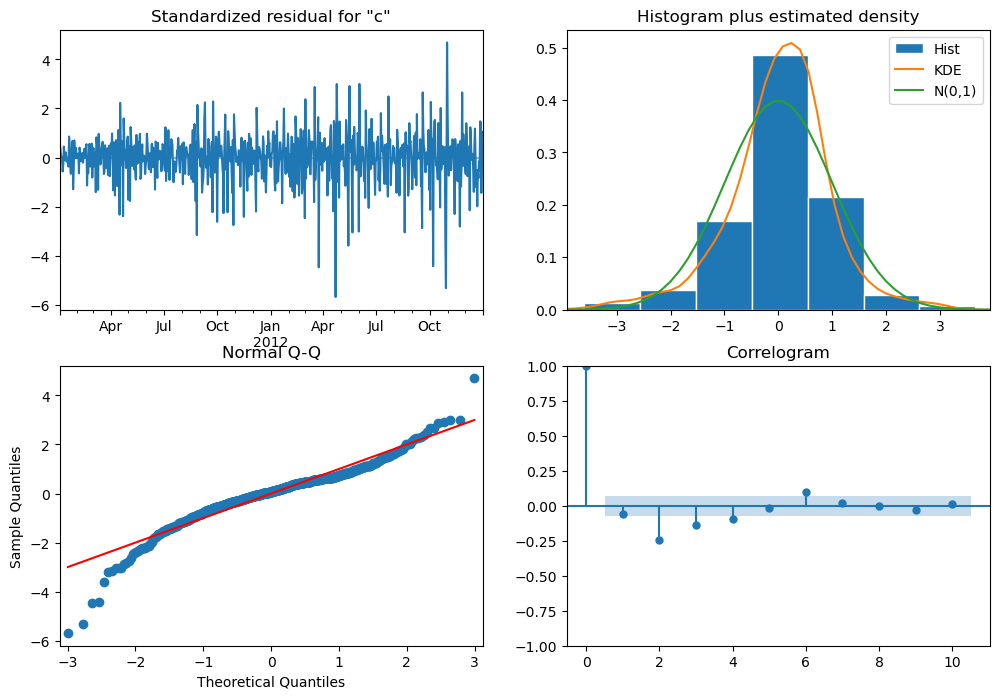

In [42]:
model = ARIMA(day_df['cnt'], order=(1, 1, 0))
model_fit = model.fit()

# Display the model summary
print(model_fit.summary())

# Plot diagnostic plots
model_fit.plot_diagnostics(figsize=(12, 8))
plt.show()

C:\Users\jeets\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\jeets\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\jeets\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                                cnt   No. Observations:                  730
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -5936.314
Date:                            Wed, 20 Nov 2024   AIC                          11882.628
Time:                                    11:53:42   BIC                          11905.504
Sample:                                01-02-2011   HQIC                         11891.461
                                     - 12-31-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3528      0.038      9.206      0.000       0.278       0.428
ma.L1         -0.8856      0.023   

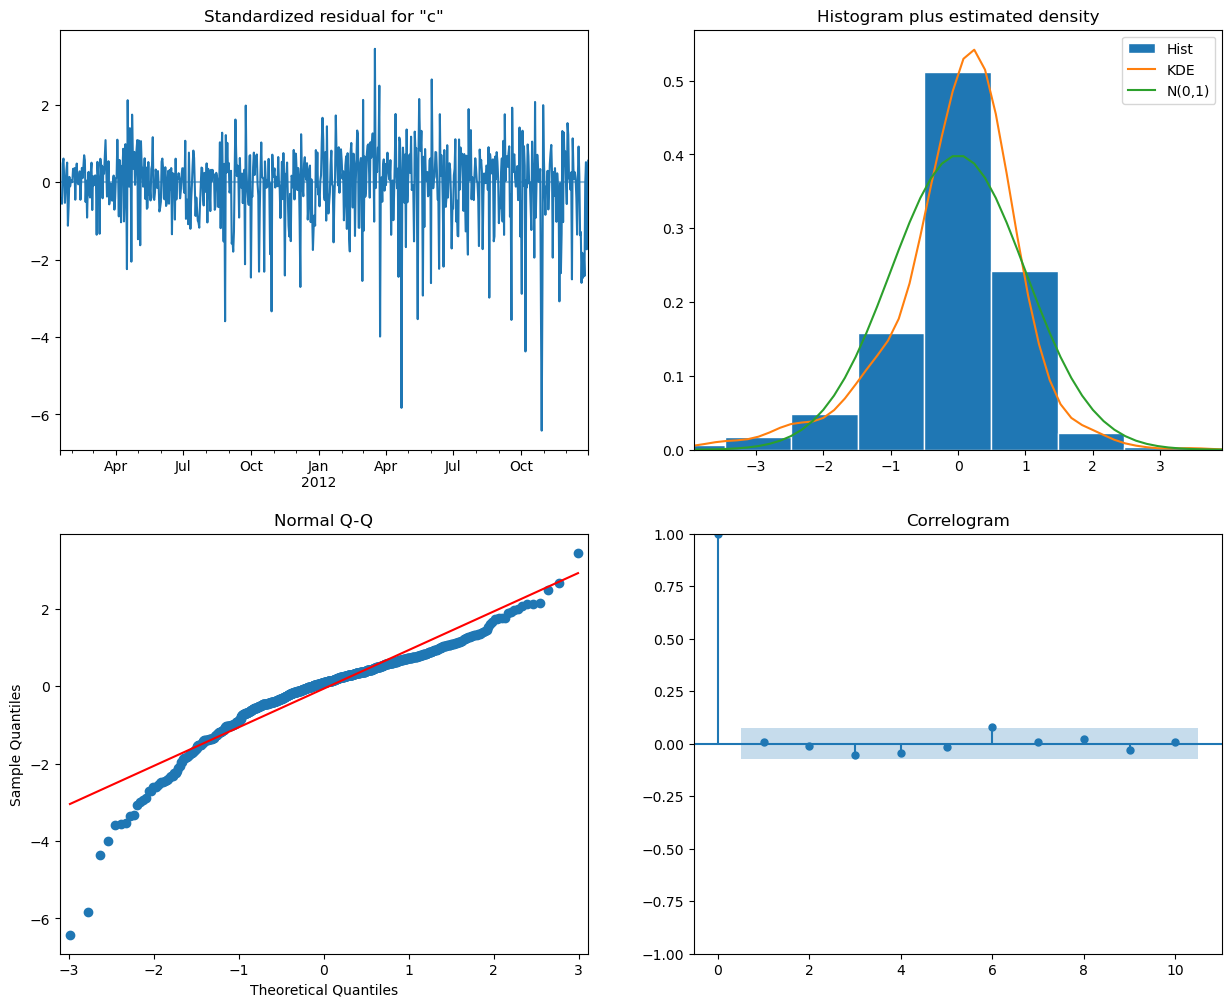

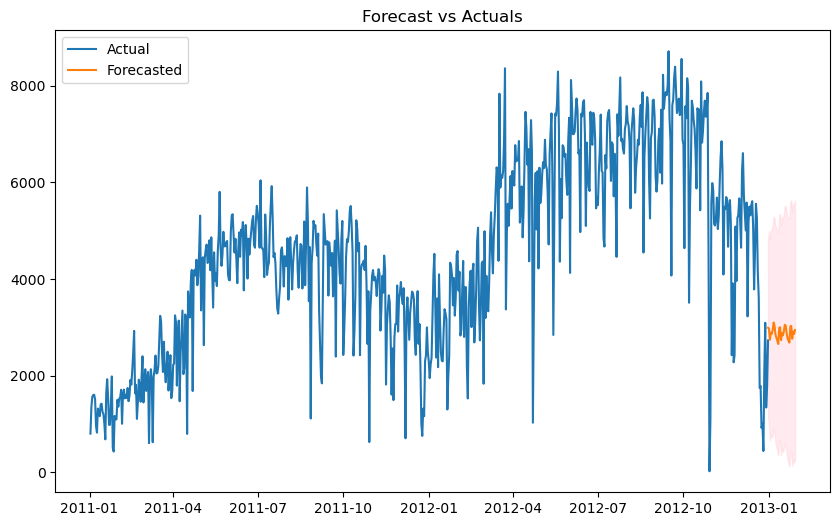

In [43]:
# Define a SARIMA Model
sarima_model = SARIMAX(day_df['cnt'],
                       order=(1, 1, 1),              # Non-seasonal parameters
                       seasonal_order=(1, 1, 1, 12) # Seasonal parameters
                      )

# Fit the model
sarima_result = sarima_model.fit()

# Summarize the model
print(sarima_result.summary())

# Check diagnostics
sarima_result.plot_diagnostics(figsize=(15, 12))
plt.show()

# Forecasting
forecast_steps = 30  # Number of steps to forecast (e.g., 30 days)
forecast = sarima_result.get_forecast(steps=forecast_steps)
forecast_ci = forecast.conf_int()

# Plot the forecast alongside actual data
plt.figure(figsize=(10, 6))
plt.plot(day_df['cnt'], label='Actual')
plt.plot(pd.date_range(day_df.index[-1], periods=forecast_steps, freq='D'), forecast.predicted_mean, label='Forecasted')
plt.fill_between(pd.date_range(day_df.index[-1], periods=forecast_steps, freq='D'), forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Forecast vs Actuals')
plt.legend()
plt.show()

C:\Users\jeets\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


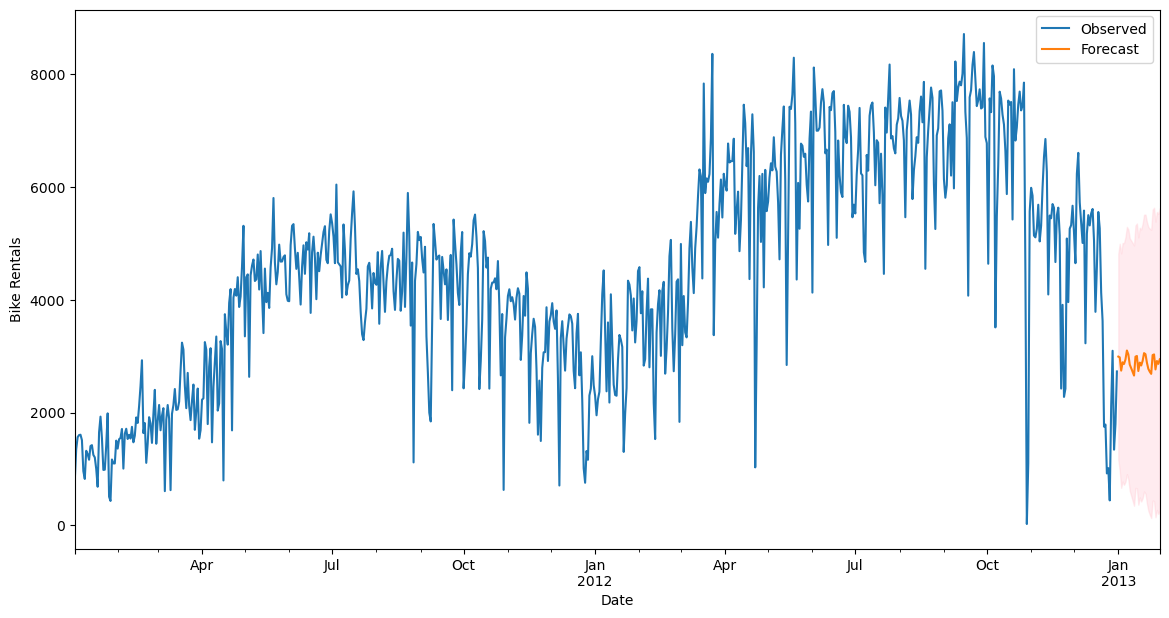

In [44]:
results = sarima_model.fit()
# Forecast the next 30 days
forecast_steps = 30
pred = results.get_forecast(steps=forecast_steps)
pred_ci = pred.conf_int()

# Plot the historical data and future predictions
ax = day_df['cnt'].plot(label='Observed', figsize=(14, 7))
pred.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='pink', alpha=0.3)
ax.set_xlabel('Date')
ax.set_ylabel('Bike Rentals')
plt.legend()
plt.show()

Root Mean Square Error (RMSE): 2081.0952571391717
Mean Absolute Error (MAE): 1860.3341771751961
Mean Absolute Percentage Error (MAPE): 70.73%


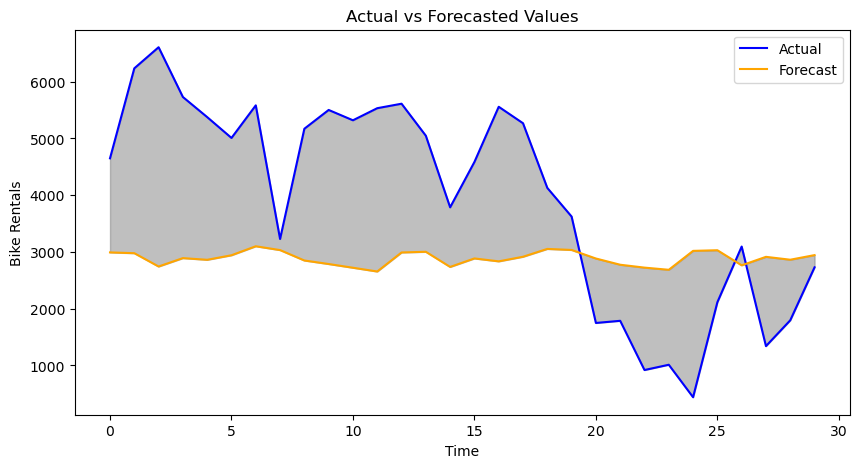

In [45]:
actuals = day_df['cnt'][-30:].values

# Extract forecasted values from the model result
predictions = pred.predicted_mean.values

# Calculate RMSE
rmse = np.sqrt(np.mean((predictions - actuals) ** 2))
print(f"Root Mean Square Error (RMSE): {rmse}")

# Calculate MAE
mae = np.mean(np.abs(predictions - actuals))
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate MAPE
mape = np.mean(np.abs((actuals - predictions) / actuals)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Qualitative Assessment - Plotting
plt.figure(figsize=(10, 5))
plt.plot(actuals, label='Actual', color='blue')
plt.plot(predictions, label='Forecast', color='orange')
plt.fill_between(range(len(predictions)), actuals, predictions, color='grey', alpha=0.5)
plt.title('Actual vs Forecasted Values')
plt.xlabel('Time')
plt.ylabel('Bike Rentals')
plt.legend()
plt.show()